In [47]:

from scipy.stats import norm
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pandas.plotting import scatter_matrix
%matplotlib inline
from scipy.stats import gaussian_kde


In [20]:
wide = pd.read_csv('wide.csv')
wide.head()

,enum,sup,a5,a6,a7,a8,a8oth,a9,consent,b11,...,c54oth,c55,c56,c57,gps-Latitude,gps-Longitude,gps-Altitude,gps-Accuracy,instanceID,KEY
0,4,1,1,7,Surjer Hasi Clinic,2,NaN,24,1,Mst. Laily Begum,...,NaN,NaN,NaN,Kichu Bolar Nai,25.778742,88.904619,-12.3,4.5,uuid:bcf738b3-6cdf-43d8-9fe8-a9c042c32c85,uuid:bcf738b3-6cdf-43d8-9fe8-a9c042c32c85
1,4,1,1,7,Surjer Hasi Clinic,2,NaN,24,1,Mst. Rani,...,NaN,NaN,NaN,Hat Dhowar Jaigai Saban Er Bebostha kora,25.778709,88.904761,-12.3,4.6,uuid:5df60dea-0a61-4acf-b473-a6de9d38048f,uuid:5df60dea-0a61-4acf-b473-a6de9d38048f
2,4,1,1,7,Surjer Hasi Clinic,2,NaN,24,1,Mst. Shahin Akter,...,NaN,NaN,NaN,Hand wash Er Bebostha Kora,25.778560,88.904667,-12.1,4.6,uuid:dcf2f1a3-444a-4d80-b0fa-4531ab195ed9,uuid:dcf2f1a3-444a-4d80-b0fa-4531ab195ed9
3,4,1,1,7,Surjer Hasi Clinic,2,NaN,24,1,Mst. Samrin Khatun,...,NaN,NaN,NaN,"Toilet Gula Arektu Parishkar Rakhar Dorkar, S...",25.778772,88.904560,-12.3,4.9,uuid:f69053c7-2dfc-43b7-adeb-590c50cd7ade,uuid:f69053c7-2dfc-43b7-adeb-590c50cd7ade
4,4,1,1,7,Surjer Hasi Clinic,2,NaN,24,1,Mst. Roksana,...,NaN,NaN,NaN,Hat Dhowar Sthane Saban Er Bebostha kora,25.778727,88.904573,-12.3,4.7,uuid:03806c96-39e1-4b49-978a-4cab979e959f,uuid:03806c96-39e1-4b49-978a-4cab979e959f


In [21]:
wide.describe()

,enum,sup,a5,a6,a8,a8oth,a9,consent,b12,b13,...,c53,c53oth,c54,c54oth,c55,c56,gps-Latitude,gps-Longitude,gps-Altitude,gps-Accuracy
count,33.000000,33.0,33.0,33.000000,33.0,0.0,33.0,33.0,33.000000,33.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,33.000000,33.000000,33.000000,33.000000
mean,3.484848,1.0,1.0,9.060606,2.0,NaN,24.0,1.0,1.666667,1.909091,...,NaN,NaN,NaN,NaN,NaN,NaN,25.778279,88.898542,-12.069697,5.172727
std,1.121417,0.0,0.0,2.030077,0.0,NaN,0.0,0.0,0.478714,1.307757,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000471,0.006005,1.125135,1.389306
min,2.000000,1.0,1.0,7.000000,2.0,NaN,24.0,1.0,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,25.777609,88.892664,-17.800000,3.200000
25%,3.000000,1.0,1.0,7.000000,2.0,NaN,24.0,1.0,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,25.777856,88.892783,-12.300000,4.500000
50%,3.000000,1.0,1.0,11.000000,2.0,NaN,24.0,1.0,2.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,25.777944,88.892962,-12.100000,4.700000
75%,4.000000,1.0,1.0,11.000000,2.0,NaN,24.0,1.0,2.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,25.778755,88.904634,-11.700000,4.900000
max,5.000000,1.0,1.0,11.000000,2.0,NaN,24.0,1.0,2.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,25.778813,88.904761,-10.800000,9.600000


In [22]:
wide['gps-Accuracy'].mean()

5.172727272727272

<AxesSubplot:>

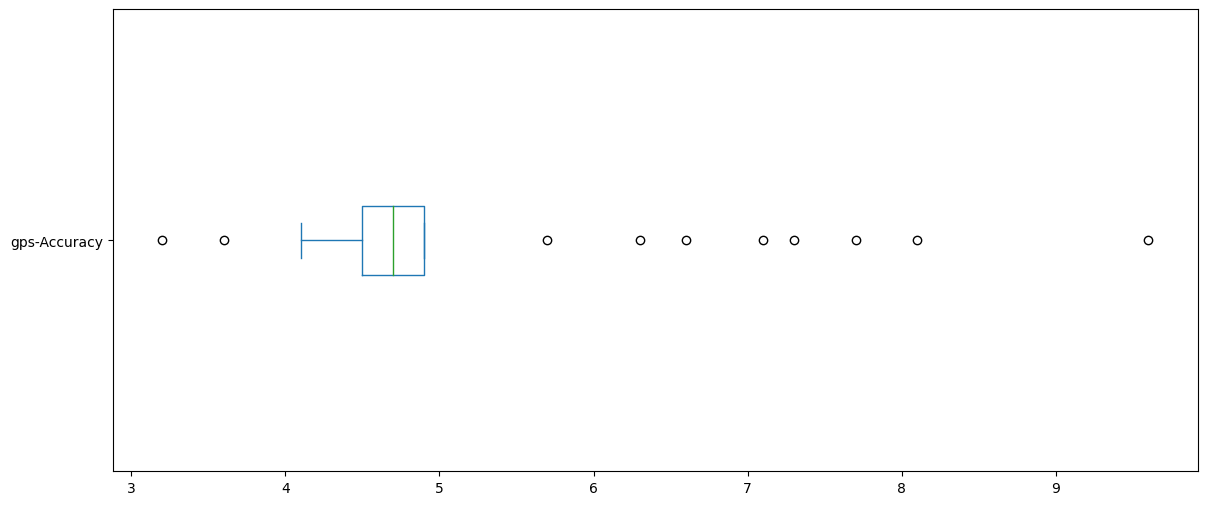

In [44]:
wide['gps-Accuracy'].plot(kind='box', vert=False,figsize=(14,6))


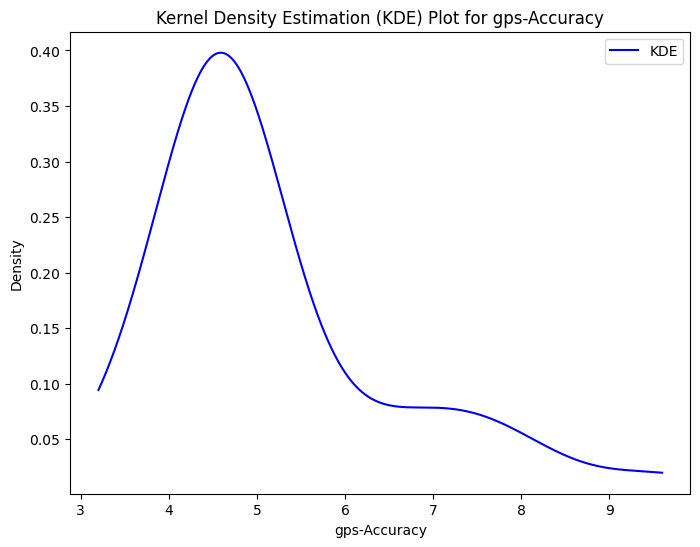

In [48]:
variable_data = wide['gps-Accuracy']

# Calculate KDE
kde = gaussian_kde(variable_data)

# Generate data points for the KDE plot
x = np.linspace(variable_data.min(), variable_data.max(), 1000)
y = kde(x)

# Plot the KDE
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='KDE')
plt.title(f'Kernel Density Estimation (KDE) Plot for gps-Accuracy')
plt.xlabel(f'gps-Accuracy')
plt.ylabel('Density')
plt.legend()
plt.show()